#PCA on MNIST dataset

Run the statement to import the TensorFlow library:

In [2]:
import tensorflow as tf

Run the statement to load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and to convert the samples from integers to floating-point numbers:

In [17]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


Importing a few libraries:

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import math

Writing some functions to produce an image from our data

In [84]:
# Plots the image represented by a row
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # the first column contains the label
        label = row[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plots a whole slice of pictures
def plot_slice(rows, size_w=28, size_h=28, labels=False):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows[n], size_w, size_h, labels)
    plt.show()

Now using these functions to plot our data

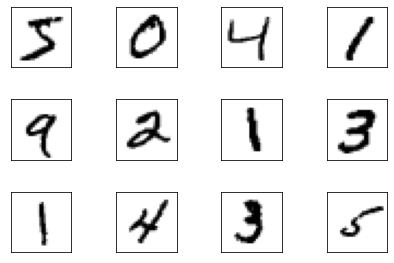

In [85]:
plot_slice(x_train[0:12])

Now we import the PCA function from sklearn

In [20]:
from sklearn.decomposition import PCA

In [59]:
x_new = x_train.reshape(60000, 28*28)

(60000, 28, 28)


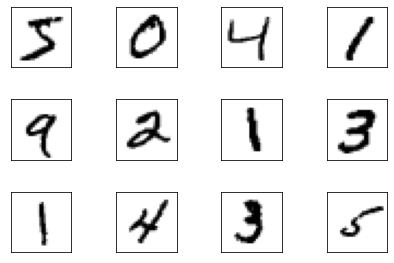

In [97]:
plot_slice(x_new[0:12])

Fill in the comments to write a code for PCA [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is the documentation

In [94]:
n_compts = 16 # try changing the value

# write the PCA function
pca = PCA(n_components=n_compts, svd_solver='randomized',
          whiten=True).fit(x_new)

# fit x_train for each value in x_train
x_train_pca = pca.transform(x_new)


Visualizing the data after PCA:

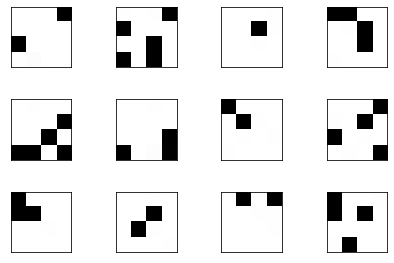

In [99]:
plot_slice(x_train_pca[0:12], size_w=4, size_h=4)